In [54]:
train_and_save = True

# Import

### Librerie

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, Model
from keras.layers import *
from sklearn.metrics import *
from keras.optimizers import Adam
from statsmodels.tsa.seasonal import seasonal_decompose
import keras.backend as K
from tensorflow import keras
from tensorflow.keras import layers
import time
from math import sqrt
import json
from efficientnet.tfkeras import EfficientNetB4

### Dataset

In [3]:
dataset = pd.read_csv('../dati_continui_con_id.csv')

In [4]:
dataset[160:180]

,user_id,date,steps,bedin,bedout,sleep duration,deepduration,lightduration
160,2bc16eda651db5936cd31e735c815296fc1579d9,2017-02-10,5305.23,25.26,6.33,4.60,1.72,2.88
161,2bc16eda651db5936cd31e735c815296fc1579d9,2017-02-11,7534.40,23.03,7.69,8.53,4.22,4.34
162,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-08,4560.29,23.53,6.28,6.51,2.08,4.44
163,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-09,6990.77,23.16,6.44,7.07,2.84,4.24
164,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-10,8324.80,23.42,5.90,6.35,2.26,4.11
165,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-11,6052.50,23.17,6.18,6.73,2.86,3.90
166,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-12,7725.14,21.67,6.95,8.72,3.79,4.98
167,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-13,10042.03,21.28,5.59,8.08,2.37,5.71
168,2bc16eda651db5936cd31e735c815296fc1579d9,2017-03-14,7957.16,25.40,7.71,6.16,2.24,3.91
169,ce96039ca66a9b98f97b202c177cf0ef7d4aa97d,2016-04-19,6689.42,23.37,6.47,6.53,1.18,3.83


In [5]:
# creo una lista di di dataframe dove ogni elemento è l'insieme delle date per utente
utenti = []
# carico elenco utenti per scorrere tutti gli id
elenco_utenti = pd.read_csv('../../dataset/userinfo.csv')
elenco_utenti.drop(elenco_utenti.columns[[0, 3]], axis=1, inplace=True)
elenco_utenti.columns = ['user_id', 'timezone', 'sex', 'age', 'height']
elenco_utenti.head()

,user_id,timezone,sex,age,height
0,fe5d7aacd82682e68d94ea1e6aa33a1e858337f7,PDT,Female,39,175
1,88359b8e24f4d6b758fb4566860ba9842fc5b350,UTC,Male,26,179
2,e061ccf5eece921027f618686a5aa2412d753b6b,PDT,Female,27,169
3,2e88aac4e69049d0845a5e2dce661ae8f4f55239,UTC,Male,61,177
4,b4e87340761e4c917db734cd52f56ed9abd0b314,UTC,Male,48,167


In [6]:
dataset.set_index(['user_id','date'], inplace=True)
dataset

steps  bedin  bedout  \
user_id                                  date                                 
2bc16eda651db5936cd31e735c815296fc1579d9 2016-04-19  7716.87  24.08    6.81   
                                         2016-04-20  7647.55  27.36    6.50   
                                         2016-04-21  6041.68  23.79    7.93   
                                         2016-04-22  5094.85  25.94    6.44   
                                         2016-04-23  4428.15  25.50   11.75   
...                                                      ...    ...     ...   
b2caf89287780fcb5cc28c092dc5d4eacb931e88 2017-03-27  5573.72  21.02    6.36   
                                         2017-03-28  6935.26  20.89    7.32   
                                         2017-03-29  4976.99  20.86    7.07   
                                         2017-03-30  3719.77  26.25    7.91   
                                         2017-03-31  9060.18  22.75    7.20   

                                                     sleep duration  \
user_id                                  date                         
2bc16eda651db5936cd31e735c815296fc1579d9 2016-04-19            5.98   
                                         2016-04-20            3.00   
                                         2016-04-21            7.61   
                                         2016-04-22            4.59   
                                         2016-04-23            9.91   
...                                                             ...   
b2caf89287780fcb5cc28c092dc5d4eacb931e88 2017-03-27            8.87   
                                         2017-03-28            9.17   
                                         2017-03-29            9.27   
                                         2017-03-30            5.30   
                                         2017-03-31            7.80   

                                                     deepduration  \
user_id                                  date                       
2bc16eda651db5936cd31e735c815296fc1579d9 2016-04-19          1.08   
                                         2016-04-20          1.61   
                                         2016-04-21          3.40   
                                         2016-04-22          1.28   
                                         2016-04-23          4.98   
...                                                           ...   
b2caf89287780fcb5cc28c092dc5d4eacb931e88 2017-03-27          4.71   
                                         2017-03-28          5.23   
                                         2017-03-29          5.45   
                                         2017-03-30          2.65   
                                         2017-03-31          4.07   

                                                     lightduration  
user_id                                  date                       
2bc16eda651db5936cd31e735c815296fc1579d9 2016-04-19           4.87  
                                         2016-04-20           1.37  
                                         2016-04-21           4.22  
                                         2016-04-22           3.33  
                                         2016-04-23           4.84  
...                                                            ...  
b2caf89287780fcb5cc28c092dc5d4eacb931e88 2017-03-27           4.16  
                                         2017-03-28           3.92  
                                         2017-03-29           3.81  
                                         2017-03-30           2.64  
                                         2017-03-31           3.69  

[979313 rows x 6 columns]

In [7]:
# inserisco per ogni elemento della lista il dataframe relativo ad un utente presente nel dataset
for i, r in elenco_utenti.iterrows():
    utente = r['user_id']
    if utente in dataset.index:
        utenti.append(dataset.loc[utente])

In [8]:
# elimina stagionalitò
senza_stag = []
#stato = 0
for corrente in utenti:
    #print(str(stato) + " / 7984 ")
    #stato = stato+1;
    if len(corrente) >=14:
        lista_stag = []
        lista_stag.append(corrente[['steps']].squeeze() - seasonal_decompose(corrente[['steps']], model='additive', period = 7).seasonal)
        lista_stag.append(corrente[['bedin']].squeeze() - seasonal_decompose(corrente[['bedin']], model='additive', period = 7).seasonal)
        lista_stag.append(corrente[['bedout']].squeeze() - seasonal_decompose(corrente[['bedout']], model='additive', period = 7).seasonal)
        lista_stag.append(corrente[['sleep duration']].squeeze() - seasonal_decompose(corrente[['sleep duration']], model='additive', period = 7).seasonal)
        lista_stag.append(corrente[['deepduration']].squeeze()  - seasonal_decompose(corrente[['deepduration']], model='additive', period = 7).seasonal)
        lista_stag.append(corrente[['lightduration']].squeeze() - seasonal_decompose(corrente[['lightduration']], model='additive', period = 7).seasonal)
        frame = {'steps' : lista_stag[0], 'bedin' : lista_stag[1], 'bedout' : lista_stag[2], 'sleep duration' : lista_stag[3], 'deepduration' : lista_stag[4], 'lightduration' : lista_stag[5]}
        senza_stag.append(pd.DataFrame(frame))
utenti = senza_stag

In [9]:
# Funzione normalizzazione
scaler = MinMaxScaler(feature_range=(0,1))
def normalizza(dat):
    df_for_training_scaled = scaler.fit_transform(dat)
    return df_for_training_scaled

In [10]:
# Adesso normalizza ogni dataset
utenti_normalizzati = []
for u in utenti:
    utenti_normalizzati.append(normalizza(u))

In [11]:
#n_past is the number of step we will look in the past to predict the next target value.
col2pred = 4  # 0:steps, 1:bedin, 2:bedout, 3:sleep duration, 4:deep duration, 5:lightduration
window_size = 7
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            #per ogni feature fa l'append dei precedenti
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])  
            dataY.append(dataset[i,col2pred])
    return np.array(dataX),np.array(dataY)

In [12]:
n_utenti_train = 6500

In [13]:
# crea insieme di train
train_lista = utenti_normalizzati[:n_utenti_train]

trainX_lista = []
trainY_lista = []

for t in train_lista:
    trainX_temp, trainY_temp = createXY(t,window_size)
    if len(trainX_temp.shape) == 3 and len(trainY_temp.shape) == 1:
        trainX_lista.append(trainX_temp)
        trainY_lista.append(trainY_temp)

trainX = np.concatenate(trainX_lista)
trainY = np.concatenate(trainY_lista)

In [14]:
# crea insieme di test
test_lista = utenti_normalizzati[n_utenti_train:]

testX_lista = []
testY_lista = []

for t in test_lista:
    testX_temp, testY_temp = createXY(t,window_size)
    if len(testX_temp.shape) == 3 and len(testY_temp.shape) == 1:
        testX_lista.append(testX_temp)
        testY_lista.append(testY_temp)

testX = np.concatenate(testX_lista)
testY = np.concatenate(testY_lista)

In [15]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(819942, 7, 6) (101933, 7, 6) (819942,) (101933,)


In [16]:
# features num
features_num = dataset.shape[1]
features_num

6

# Metriche ()

In [58]:
def metrics(model, trainX, trainY, testX, testY, history):
    
    # stampa metriche
    score_train = model.evaluate(trainX, trainY, verbose = 0)
    print("**********TRAIN-SET***********")
    print("MSE: {}".format(score_train[1]))
    print("RMSE: {}".format(sqrt(score_train[1])))
    print("MAE: {}".format(score_train[2]))
    
    score_test = model.evaluate(testX, testY, verbose = 0)
    print("**********TEST-SET***********")
    print("MSE: {}".format(score_test[1]))
    print("RMSE: {}".format(sqrt(score_test[1])))
    print("MAE: {}".format(score_test[2]))

    #plot predizioni
    prediction_test=model.predict(testX, verbose = 0)
    prediction_copies_test_array = np.repeat(prediction_test,features_num, axis=-1)
    pred_test=scaler.inverse_transform(np.reshape(prediction_copies_test_array,(len(prediction_test),features_num)))[:,col2pred]
    true_value_test_copies_array = np.repeat(testY,features_num, axis=-1)
    true_value_test=scaler.inverse_transform(np.reshape(true_value_test_copies_array,(len(testY),features_num)))[:,col2pred]
    
    plt.plot(true_value_test[:150], color='red', label='Real deep duration')
    plt.plot(pred_test[:150], color='blue', label='Predicted deep duration')
    plt.title('Deep duration Prediction')
    plt.xlabel('Time')
    plt.ylabel('Deep duration')
    plt.legend()
    plt.show()
    
    # plot andamento loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss (mse)')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # plot andamento loss
    plt.plot(history['mae'])
    plt.plot(history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Data manipulation 

In [18]:
def values4metrics(model, trainX, trainY, testX, testY):
    prediction_train = model.predict(trainX)
    prediction_train_copies_array = np.repeat(prediction_train, features_num, axis=-1)
    pred_train = scaler.inverse_transform(np.reshape(prediction_train_copies_array, (len(prediction_train), features_num)))[:, col2pred]
    true_value_train_copies_array = np.repeat(trainY, features_num, axis=-1)
    true_value_train = scaler.inverse_transform(np.reshape(true_value_train_copies_array, (len(trainY), features_num)))[:, col2pred]

    prediction_test=model.predict(testX)
    prediction_copies_test_array = np.repeat(prediction_test,features_num, axis=-1)
    pred_test=scaler.inverse_transform(np.reshape(prediction_copies_test_array,(len(prediction_test),features_num)))[:,col2pred]
    true_value_test_copies_array = np.repeat(testY,features_num, axis=-1)
    true_value_test=scaler.inverse_transform(np.reshape(true_value_test_copies_array,(len(testY),features_num)))[:,col2pred]
    
    return true_value_train, pred_train, true_value_test, pred_test

# Architetture di supporto

In [20]:
class Time2Vec(Layer):

    def __init__(self, output_dimension=None, **kwargs):
        self.output_dimension = output_dimension
        super(Time2Vec, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dimension": self.output_dimension,
        })
        return config

    def build(self, input_shape):

        self.W = self.add_weight(name='W',
                                shape=(input_shape[-1], self.output_dimension),
                                initializer='uniform',
                                trainable=True)

        self.P = self.add_weight(name='P',
                                shape=(input_shape[1], self.output_dimension),
                                initializer='uniform',
                                trainable=True)

        self.w = self.add_weight(name='w',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        self.p = self.add_weight(name='p',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        super(Time2Vec, self).build(input_shape)

    def call(self, x):

        original = self.w * x + self.p
        sin_trans = K.sin(K.dot(x, self.W) + self.P)

        return K.concatenate([sin_trans, original], -1)

In [21]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape,head_size,num_heads,ff_dim,num_transformer_blocks,mlp_units,dropout=0,mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="tanh")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

input_shape = trainX.shape[1:]

model_transformer = build_model(input_shape,head_size=256,num_heads=4,ff_dim=4,num_transformer_blocks=4,mlp_units=[128],mlp_dropout=0.4,dropout=0.25)

model_transformer.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['mse', 'mae'])

# Funzione per richiamare i modelli

In [75]:
def model_recurrent(type = 'gru'):
    model = Sequential()
    
    if type == 'gru': # GRU
        model.add(GRU(256, return_sequences=True, input_shape=(window_size, features_num)))
        model.add(GRU(128, return_sequences=True))
        model.add(GRU(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))
        
    if type == 'lstm': # LSTM
        model.add(LSTM(256, return_sequences=True,input_shape=(window_size, features_num)))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))
    
    if type == 'bidirectional':  # Bidirectional
        model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(window_size,features_num)))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Bidirectional(LSTM(64)))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))   

    if type == 'time2vec':  # Time2Vec
        model.add(Input(shape=(window_size, features_num)))
        model.add(Time2Vec(120))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))  
        
    if type == 'cnn':  # CNN
        model.add(Conv1D(filters=128, kernel_size=2, activation='tanh', input_shape=(window_size,features_num)))
        model.add(Conv1D(filters=64, kernel_size=2, activation='tanh'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(RepeatVector(features_num))
        model.add(LSTM(units=100, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100))
        model.add(Dense(100, activation='tanh'))        

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse', 'mae'])
    return model 

# Iperparametri

In [49]:
n_epoche = 50
batch = 4096 # 8192 - 4096

# GRU

In [24]:
model_gru = model_recurrent('gru')
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 256)            202752    
                                                                 
 gru_1 (GRU)                 (None, 7, 128)            148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [27]:
if train_and_save == True:
    start = time.time()
    history_gru = model_gru.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_gru = end-start
    model_gru.save('./trained_model/model_gru_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_gru = keras.models.load_model('./trained_model/model_gru_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

# LSTM

In [28]:
model_lstm = model_recurrent('lstm')
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 256)            269312    
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [29]:
if train_and_save == True:
    start = time.time()
    history_lstm = model_lstm.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_lstm = end-start
    model_lstm.save('./trained_model/model_lstm_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_lstm = keras.models.load_model('./trained_model/model_lstm_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

# Bidirectional - LSTM

In [30]:
model_bi = model_recurrent('bidirectional')
model_bi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 512)           538624    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 256)           656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                      

In [31]:
if train_and_save == True:
    start = time.time()
    history_bi = model_bi.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_bi = end-start
    model_bi.save('./trained_model/model_bidirectional_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_bi = keras.models.load_model('./trained_model/model_bidirectional_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

# Time2Vec - LSTM

In [32]:
model_t2v = model_recurrent('time2vec')
model_t2v.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time2_vec (Time2Vec)        (None, 7, 126)            1574      
                                                                 
 lstm_6 (LSTM)               (None, 7, 128)            130560    
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [33]:
if train_and_save == True:
    start = time.time()
    history_t2v = model_t2v.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_t2v = end-start
    model_t2v.save('./trained_model/model_time2vec_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_t2v = keras.models.load_model('./trained_model/model_time2vec_e' + str(n_epoche) + "_b" + str(batch) + '.h5', custom_objects={'Time2Vec': Time2Vec})

# CNN - LSTM

In [76]:
model_cnn = model_recurrent('cnn')
model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 6, 128)            1664      
                                                                 
 conv1d_20 (Conv1D)          (None, 5, 64)             16448     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 128)               0         
                                                                 
 repeat_vector_7 (RepeatVect  (None, 6, 128)           0         
 or)                                                             
                                                                 
 lstm_23 (LSTM)              (None, 6, 100)          

In [77]:
if train_and_save == True:
    start = time.time()
    history_cnn = model_cnn.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_cnn = end-start
    model_cnn.save('./trained_model/model_cnn_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_cnn = keras.models.load_model('./trained_model/model_cnn_e' + str(n_epoche) + "_b" + str(batch) + '.h5')

Epoch 1/2
161/161 [==============================] - 9s 29ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1503 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1421
Epoch 2/2
161/161 [==============================] - 3s 21ms/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1433 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1410


# T2V - Transformer 

In [39]:
model_transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 6)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 7, 6)        12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 7, 6)        27654       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

 mbda)                                                            'tf.__operators__.add_5[0][0]'] 
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 7, 6)        12          ['tf.__operators__.add_6[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv1d_6 (Conv1D)              (None, 7, 4)         28          ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_7 (Dropout)            (None, 7, 4)         0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 7, 6)         30          ['dropout_7[0][0]']              
          

In [40]:
if train_and_save == True:
    start = time.time()
    history_t= model_transformer.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_t = end-start;
    model_transformer.save('./trained_model/model_transformer_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_transformer = keras.models.load_model('./trained_model/model_transformer_e' + str(n_epoche) + "_b" + str(batch) + '.h5')

##### Salva i tempi di allenamento

In [41]:
if train_and_save == True:
    dictionary = {
        "gru": time_gru,
        "lstm": time_lstm,
        "bidirectional": time_bi,
        "time2vec": time_t2v,
        "cnn": time_cnn,
        "transformer": time_t
    }

    with open("./trained_model/training_times.json", "w") as outfile:
        json.dump(dictionary, outfile)
        
        
        
with open("./trained_model/training_times.json", 'r') as openfile:
    dict_times = json.load(openfile)

In [42]:
if train_and_save == True:
    dictionary = {
        "gru": history_gru.history,
        "lstm": history_lstm.history,
        "bidirectional": history_bi.history,
        "time2vec": history_t2v.history,
        "cnn": history_cnn.history,
        "transformer": history_t.history
    }

    with open("./trained_model/training_histories.json", "w") as outfile:
        json.dump(dictionary, outfile)
        
        
with open("./trained_model/training_histories.json", 'r') as openfile:
    dict_histories = json.load(openfile)

# Plot

--- GRU ---

Time: 22.495807886123657
**********TRAIN-SET***********
MSE: 0.03300662711262703
RMSE: 0.18167726085734293
MAE: 0.14238345623016357
**********TEST-SET***********
MSE: 0.03286340832710266
RMSE: 0.1812826751984388
MAE: 0.14210925996303558


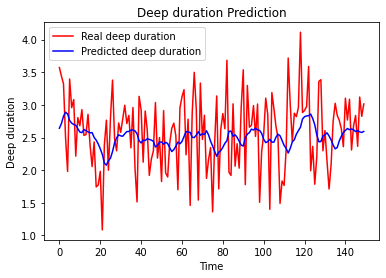

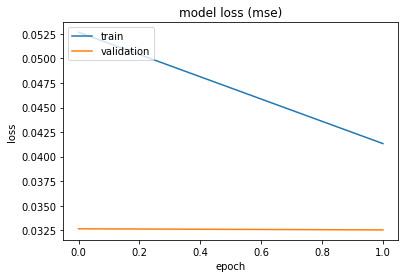

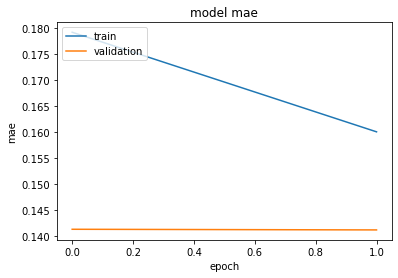

In [45]:
print("--- GRU ---\n\nTime: " + str(dict_times['gru']))
metrics(model_gru, trainX, trainY, testX, testY, dict_histories['gru'])

In [ ]:
print("--- LSTM ---\n\nTime: " + str(dict_times['lstm']))
metrics(model_lstm, trainX, trainY, testX, testY, dict_histories['lstm'])

In [ ]:
print("--- Bidirectional ---\n\nTime: " + str(dict_times['bidirectional']))
metrics(model_bi, trainX, trainY, testX, testY, dict_histories['bidirectional'])

--- Time2Vec - LSTM ---

Time: 8.367257356643677
**********TRAIN-SET***********
MSE: 0.0334809273481369
RMSE: 0.1829779422447878
MAE: 0.14303387701511383
**********TEST-SET***********
MSE: 0.03337913379073143
RMSE: 0.18269957249739646
MAE: 0.14290286600589752


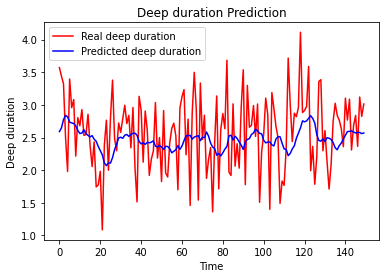

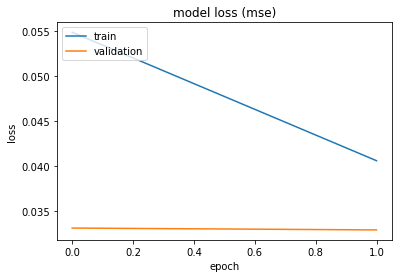

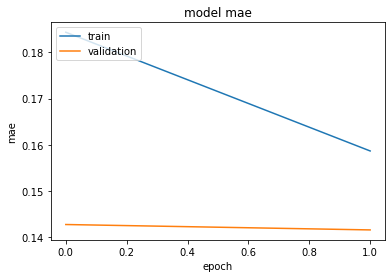

In [43]:
print("--- Time2Vec - LSTM ---\n\nTime: " + str(dict_times['time2vec']))
metrics(model_t2v, trainX, trainY, testX, testY, dict_histories['time2vec'])

--- CNN - LSTM ---

Time: 54.37760329246521
(101933, 1)


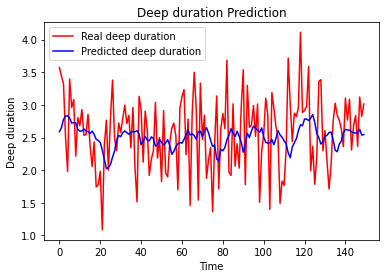

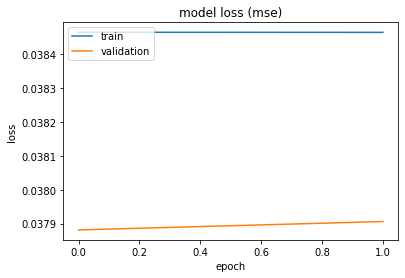

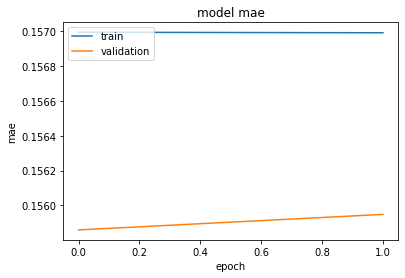

In [78]:
print("--- CNN - LSTM ---\n\nTime: " + str(dict_times['cnn']))
metrics(model_cnn, trainX, trainY, testX, testY, dict_histories['cnn'])

In [ ]:
print("--- Transformer ---\n\nTime: " + str(dict_times['transformer']))
metrics(model_transformer, trainX, trainY, testX, testY, dict_histories['transformer'])